# Module 7 Machine Learning

## Author: Kari Taylor

## This module 7 project will employ machine learning to build a model, make predictions, visualize the model, and draw conclusions from the data. 

### *Import External Dependencies*

In [50]:
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

## **Part 1: Chart a Straight Line**

Create a function to calculate Celsius temperatures to Fahrenheit 

In [2]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

Load temps data into dataframe

In [4]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

Prepare axes and labels

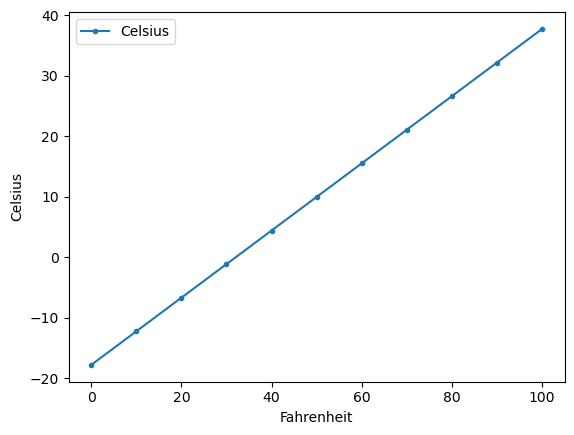

In [5]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## **Part 2: Prediction**

### *Section 1 - Data Acquisition*

Load the dataset into the dataframe

In [6]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### *Section 2 - Data Inspection*

Inspect the first and last 5 entries

In [7]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [8]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### *Section 3 - Data Cleaning*

Rename columns and clean up the date series

In [9]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [10]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [11]:
nyc_df.Date.dtype

dtype('int64')

In [12]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [13]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### *Section 4 - Descriptive Statistics*

Pull statistics info from the dataset

In [14]:
pd.set_option('display.precision', 2)

In [15]:
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### *Section 5 - Build the Model*

Calculate slope and intercept

In [17]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [18]:
print('Slope is:', linear_regression.slope)

Slope is: 0.014771361132966163


In [19]:
print('Intercept is:', linear_regression.intercept)

Intercept is: 8.694993233674289


The slope and intercept allow us to use the following formula to predict future temperatures: 
y = mx + b

In this equation, y = predicted future temp, m = slope, x = future year, and b = intercept. 

### *Section 6 - Predict*

Use the model to predict the average high temp in January for a given year

In [20]:
print('Predicted average high temperature in January 2024 is:', linear_regression.slope * 2024 + linear_regression.intercept)

Predicted average high temperature in January 2024 is: 38.5922281667978


### *Section 7 - Visualizations* 

Plot the average high temps with a scatter plot

Prepare grid and axes

In [23]:
sns.set_style('whitegrid')

(10.0, 70.0)

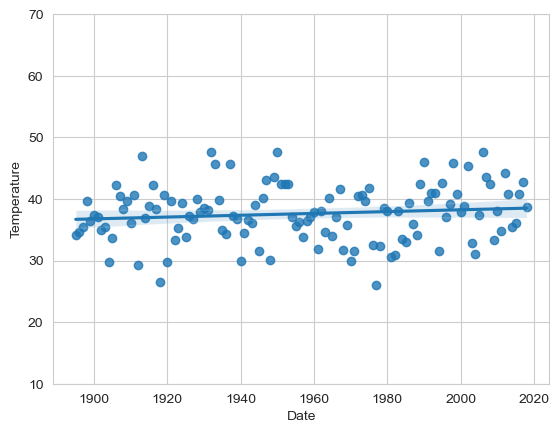

In [26]:
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## **Part 3 - Prediction**

### *Section 1 - Build the Model*

Split data into parts

In [28]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

Check shape of data

In [29]:
X_train.shape

(93, 1)

In [30]:
X_test.shape

(31, 1)

Train the model

In [32]:
linear_regression = LinearRegression()

In [33]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

Find slope and intercept

In [34]:
print('Slope is:', linear_regression.coef_)

Slope is: [0.01939167]


In [37]:
print('Intercept is:', linear_regression.intercept_)

Intercept is: -0.30779820252656265


Reminder: calculating the slope and intercept allow us to use the following formula to predict future temperatures: 
y = mx + b

In this equation, y = predicted future temp, m = slope, x = future year, and b = intercept.

### *Section 2 - Test the Model*

In [38]:
predicted = linear_regression.predict(X_test)

In [39]:
expected = y_test

In [40]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### *Section 3 - Predict*

Predict the average high temp in January of 2024 using the model

In [41]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [43]:
print('Predicted high temperature in January of 2024 is:', predict(2019))

Predicted high temperature in January of 2024 is: [38.84399018]


### *Section 4 - Visualizations*

Plot the average high temps with a scatterplot

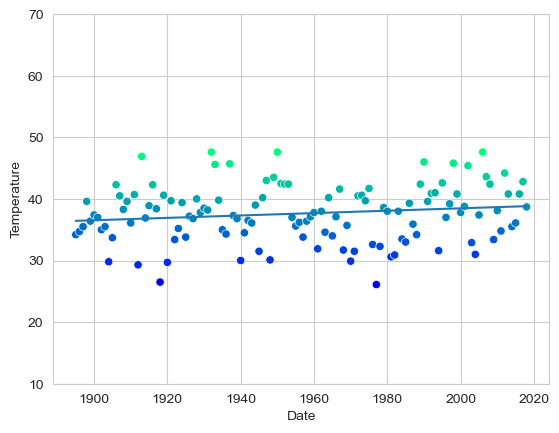

In [49]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## **Part 4 - Insights**

Part 2 of this analysis utilized the spicy.stats module's linregress function to calculate slope and intercept. These values allowed us to use the y = mx + b equation, where y = predicted future temperature, m = slope, x = future year, and b = intercept, to predict future high temperatures in January in NYC. Part 2 also utilized seaborn's regplot function to create a scatterplot of the data with a regression line included. 

Part 3 of this analysis utilized the linear regression estimator from the scikit-learn model to calculate the slope and intercept. These values allowed us to, again, use the y = mx + b equation to predict future high temperatures in January in NYC. Part 3 also utilized seaborn and matplotlib to plot the data and display the regression line. 

The analysis performed in Part 2 predicted that the high temperature in January of 2024 would be 38.59 degress Fahrenheit. The analysis performed in Part 3 predicted that the high temperature in January of 2024 would be 38.84 degrees Fahrenheit. 

Both methods of analysis resulted in very similar predictions, which makes it difficult to determine one's superiority over the other. However, Part 2's use of the linregress function seemed a little bit simpler and easier to understand. It was difficult to wrap my brain around Part 3's method --- which requires splitting the data apart, training the model, and testing the data. However, it seems like Part 3's use of the linear regression estimator from the scikit-learn model would be a much better option when multiple linear regression is necessary. If I'm understanding the material correctly, linregress can only be used for single linear regression models, whereas scikit-learn's regression estimator can be used for both single and multiple linear regression models.  

## **Part 5 - Bonus**

### *Section 1 - Data Acquisition*

Load the dataset into the dataframe 

In [51]:
from sklearn.datasets import fetch_california_housing

In [52]:
california = fetch_california_housing()

### *Section 2 - Data Inspection*

Display the dataset's description 

In [53]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [54]:
california.data.shape

(20640, 8)

In [55]:
california.target.shape

(20640,)

In [56]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Explore the data with pandas

In [60]:
pd.set_option('display.precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

OptionError: Pattern matched multiple keys